In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import altair as alt

from matplotlib import pyplot as plt

# <center> Toy example

In [2]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_classes=2, class_sep=1.5, weights=[0.9, 0.1],
    n_informative=3, n_redundant=1, flip_y=0,
    n_features=20, n_clusters_per_class=1,
    n_samples=1000, random_state=10
)
df = pd.DataFrame(X)
df['target'] = y
df.head()

0         1         2         3         4         5         6  \
0  0.600131 -1.427664 -0.812843  0.186196 -0.446072  0.961538 -0.108172   
1  0.253641 -1.456387 -0.522598 -1.200570 -0.595553 -1.588192 -0.489398   
2  0.182256 -1.279602  0.678077 -0.107072 -1.891533  1.219016  0.131442   
3 -0.313907 -2.714269 -0.461789  0.451429  0.299209  1.311730  0.320658   
4 -1.262870  0.119181 -1.234628  0.253147  1.551433  1.651135 -0.034720   

          7         8         9  ...        11        12        13        14  \
0 -0.121374 -0.064468 -1.331016  ... -0.139450  0.030954 -0.517951 -0.429622   
1  0.752679 -0.433422  1.552543  ... -0.753243  0.655625  0.612429 -1.190286   
2  0.766967 -1.461127 -0.505163  ...  0.361457  0.535316 -1.117117  0.500309   
3 -1.460665 -1.075703  0.303755  ... -0.850576 -2.456657 -0.533510 -1.476944   
4 -0.633148 -1.769543 -0.164800  ...  1.080204 -0.765970 -0.633663 -2.961579   

         15        16        17        18        19  target  
0 -0.450095  2.303853 -0.553024  0.148770 -1.247959       0  
1  0.197738  1.001912  1.694093 -0.249699  0.270857       0  
2 -0.062337 -1.664217 -0.811151 -0.287336 -1.234176       0  
3  0.430563 -1.735455 -2.002849  1.215284 -0.500204       0  
4  1.494173 -2.712421 -0.617613 -1.445949 -1.485457       0  

[5 rows x 21 columns]

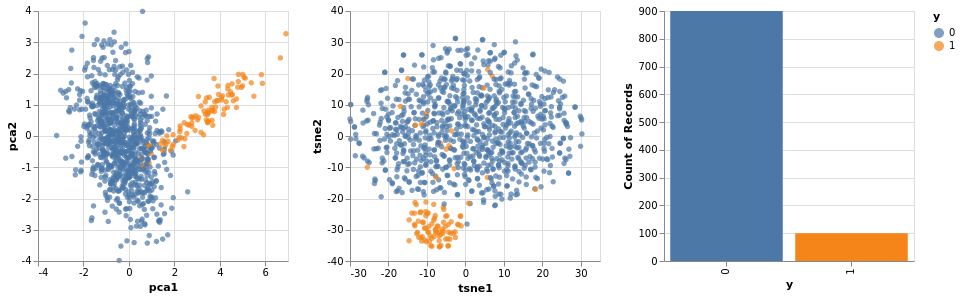

In [3]:
def plot_multidimensional(X, y):
    
    x_pca  = PCA(n_components=2).fit_transform(X)  # Compute PCA
    x_tsne = TSNE(random_state=0).fit_transform(X) # Compute TSNE
    
    df = pd.DataFrame({'pca1': x_pca[:, 0],  'pca2': x_pca[:, 1],
                      'tsne1': x_tsne[:, 0], 'tsne2': x_tsne[:, 1],
                      "y": y})
    
    brush = alt.selection(type='interval', resolve='global')
    
    scatter = alt.Chart(df).mark_circle().encode(
        color=alt.condition(brush, 'y:N', alt.ColorValue('lightgray')),
    ).add_selection(
        brush
    ).properties(
        width=250,
        height=250
    )
    
    bars = alt.Chart(df).mark_bar().encode(
        x='y:N', 
        y='count(y):Q',
        color='y:N',
    ).transform_filter(
        brush
    ).properties(
        width=250,
        height=250
    )

    return scatter.encode(x='pca1', y='pca2') | scatter.encode(x='tsne1', y='tsne2') | bars

plot_multidimensional(X, y)

# <center> Digits example

In [4]:
from sklearn.datasets import load_digits

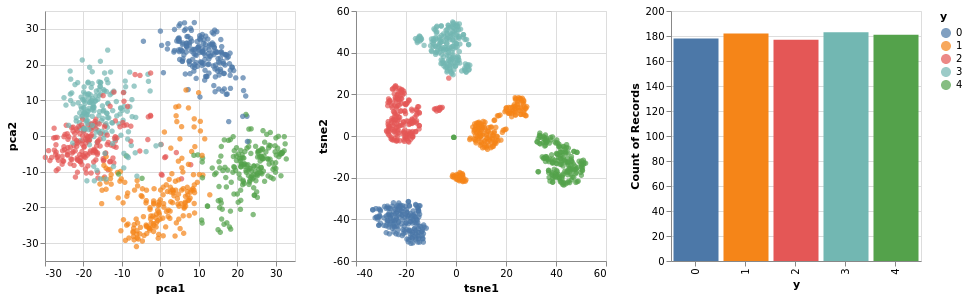

In [5]:
X_dig, y_dig = load_digits(n_class=5, return_X_y=True)
plot_multidimensional(X_dig, y_dig)

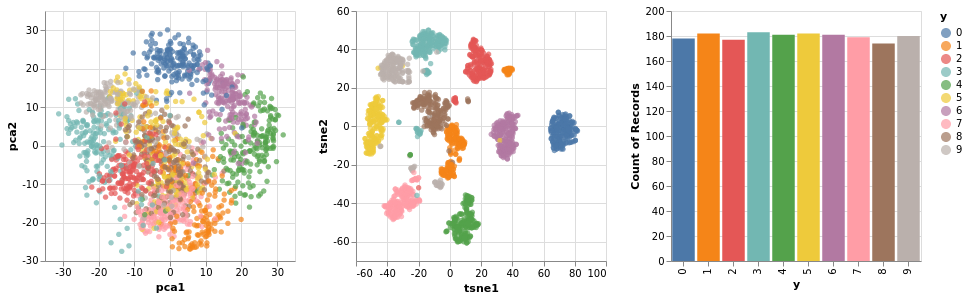

In [6]:
X_dig, y_dig = load_digits(n_class=10, return_X_y=True)
plot_multidimensional(X_dig, y_dig)

# <center> House Prices dataset

In [7]:
##### DOWNLOAD DATASET. ONLY IN COLAB !!!
!wget -P ./data/ "https://raw.githubusercontent.com/SaturdaysAI-Murcia/machine-learning/master/3. Tabular data (regr)/data/house_prices_train.csv"

--2020-02-14 16:10:33--  https://raw.githubusercontent.com/SaturdaysAI-Murcia/machine-learning/master/3.%20Tabular%20data%20(regr)/data/house_prices_train.csv
Resolviendo raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.192.133, 151.101.128.133, 151.101.64.133, ...
Conectando con raw.githubusercontent.com (raw.githubusercontent.com)[151.101.192.133]:443... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 460676 (450K) [text/plain]
Guardando como: “./data/house_prices_train.csv.7”

house_prices_train. 100%[===================>] 449,88K  2,00MB/s    en 0,2s    

2020-02-14 16:10:34 (2,00 MB/s) - “./data/house_prices_train.csv.7” guardado [460676/460676]



In [8]:
df_train = pd.read_csv("./data/house_prices_train.csv", index_col='Id')
df_train.shape

(1460, 80)

In [9]:
df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [10]:
quantitative = [f for f in df_train.columns if df_train.dtypes[f] != 'object']
quantitative.remove('SalePrice')

In [11]:
features = quantitative# + qual_encoded
model = TSNE(n_components=2, random_state=0, perplexity=50)
X = df_train[features].fillna(0.).values
tsne = model.fit_transform(X)

df_train['tsne1']   = tsne[:,0]
df_train['tsne2']   = tsne[:,1]

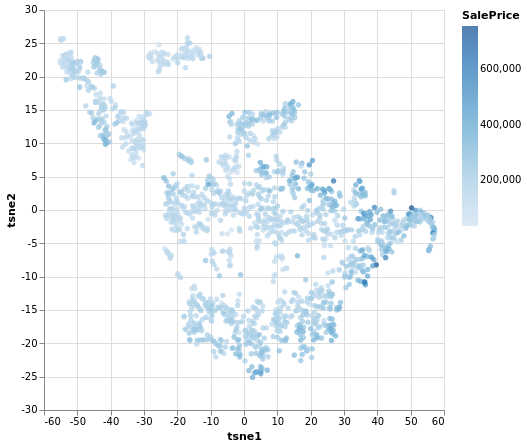

In [12]:
alt.Chart(df_train).mark_circle().encode(
    x='tsne1:Q', 
    y='tsne2:Q',
    color='SalePrice:Q',
    tooltip=['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
).properties(
    width=400,
    height=400
)

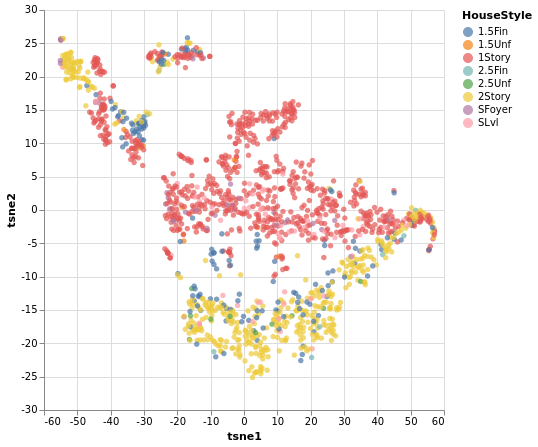

In [13]:
alt.Chart(df_train).mark_circle().encode(
    x='tsne1:Q', 
    y='tsne2:Q',
    color='HouseStyle'
).properties(
    width=400,
    height=400
)